# Initialize

In [2]:
%load_ext autoreload
%autoreload 2

#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn

import sys
sys.path.append('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders')

from AE.models import AE_0
from AE.datasets import MNISTDigit2Dataset

from AE.depth_utils import get_KL_with_HFM_with_optimal_g
from AE.depth_utils import plot_KLs_vs_hidden_layers, datasets_dicts_comparison

#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Utilizzo Apple Silicon GPU (MPS)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Utilizzo NVIDIA GPU (CUDA)")
else:
    device = torch.device("cpu")
    print("Utilizzo la CPU")

device = torch.device("cpu")  # Fallback to CPU if no GPU is available

SEED = 42
torch.manual_seed(SEED)


Utilizzo Apple Silicon GPU (MPS)



# Datasets


In [3]:
batch_size = 64

## MNIST
train_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )



## ExtendedMNIST

train_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )


## 2MNIST

dataset_2MNIST_train = MNISTDigit2Dataset(train=True, download=True, target_size=60000)
print(f"Dataset size: {len(dataset_2MNIST_train)}")
print(f"Image shape: {dataset_2MNIST_train[0][0].shape}")
print(f"Label: {dataset_2MNIST_train[0][1]}")
train_loader_2MNIST = DataLoader(dataset_2MNIST_train, batch_size=batch_size, shuffle=True)

batch_images, batch_labels = next(iter(train_loader_2MNIST))
print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")

print("\n––––––––––––––––––––––––––––––––––––––––––––––––––––––\n")

dataset_2MNIST_val = MNISTDigit2Dataset(train=False, download=True, target_size=10000)
print(f"Dataset size: {len(dataset_2MNIST_train)}")
print(f"Image shape: {dataset_2MNIST_train[0][0].shape}")
print(f"Label: {dataset_2MNIST_train[0][1]}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")
val_loader_2MNIST = DataLoader(dataset_2MNIST_val, batch_size=batch_size, shuffle=True)

print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")




#-------------------------------------------------------------------


datasets = ["MNIST", "EMNIST", "2MNIST"]
train_loaders = {
    "MNIST": train_loader_MNIST,
    "EMNIST": train_loader_EMNIST,
    "2MNIST": train_loader_2MNIST
}
val_loaders = {
    "MNIST": val_loader_MNIST,
    "EMNIST": val_loader_EMNIST,
    "2MNIST": val_loader_2MNIST
}


Found 5958 original samples of digit '2'
Generated 60000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])
All labels are 2: True

––––––––––––––––––––––––––––––––––––––––––––––––––––––

Found 1032 original samples of digit '2'
Generated 10000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
All labels are 2: True
Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])
All labels are 2: True


In [ ]:

## FashionMNIST

train_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )




## OTHERS


In [ ]:
from AE.datasets import Dataset_HFM, Dataset_pureHFM

batch_size = 64


## train over pureHFM

dataset_HFM_train = Dataset_pureHFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM/512features/glog2_train60000.pt',
                        root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

train_loader_pureHFM = DataLoader(
    dataset_HFM_train,
    batch_size= batch_size,
    shuffle=True
)

dataset_HFM_val = Dataset_pureHFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM/512features/glog2_validation10000.pt',
                            root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

val_loader_pureHFM = DataLoader(
    dataset_HFM_val, # Importante: usa dataset_HFM_val qui, non dataset_HFM
    batch_size= batch_size,
    shuffle=False
)
## train over expandedHFM
dataset_HFM_train = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/16_1024features/2hl_glog2_train60000.pt',
                        root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

train_loader_expandedHFM = DataLoader(
    dataset_HFM_train,
    batch_size= batch_size,
    shuffle=True
)

dataset_HFM_val = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/16_1024features/2hl_glog2_validation10000.pt',
                            root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

val_loader_expandedHFM = DataLoader(
    dataset_HFM_val, # Importante: usa dataset_HFM_val qui, non dataset_HFM
    batch_size= batch_size,
    shuffle=False
)
## train over expandedHFM 32-1024
dataset_HFM_train = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/32_1024features/2hl_glog2_train60000.pt',
                        root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

train_loader_expandedHFM_32_1024 = DataLoader(
    dataset_HFM_train,
    batch_size= batch_size,
    shuffle=True
)

dataset_HFM_val = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/32_1024features/2hl_glog2_validation10000.pt',
                            root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

val_loader_expandedHFM_32_1024 = DataLoader(
    dataset_HFM_val, # Importante: usa dataset_HFM_val qui, non dataset_HFM
    batch_size= batch_size,
    shuffle=False
)


# Analysis

# 20 features

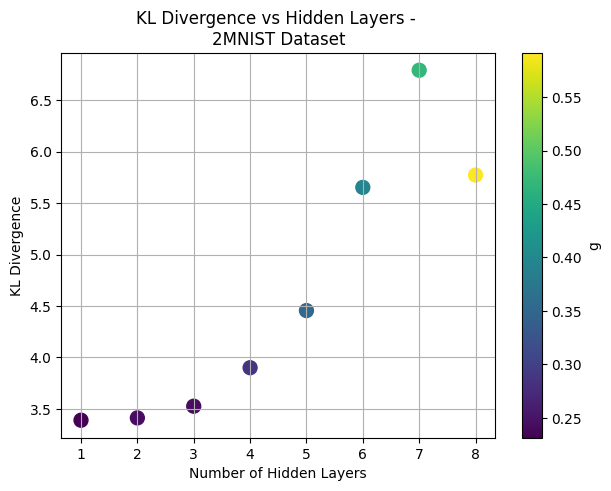

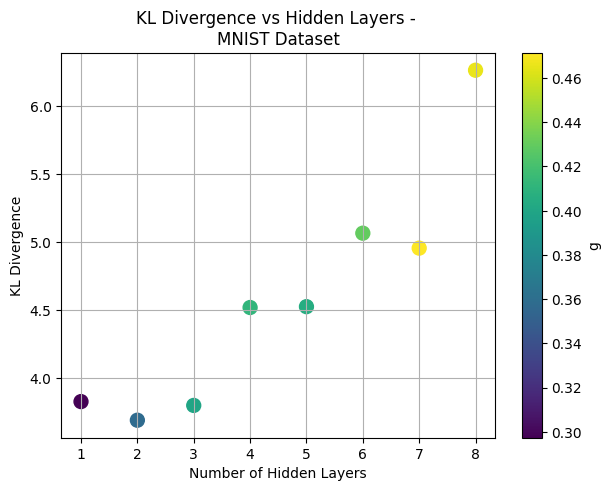

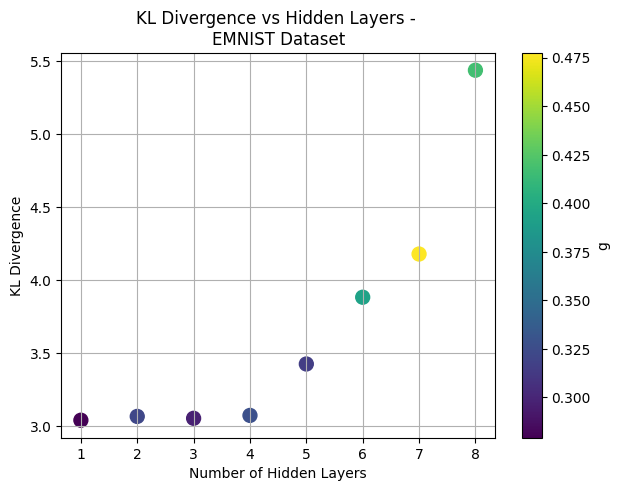

In [3]:
KLs_dict = {
    '2MNIST': [],
    'MNIST': [],
    'EMNIST': []}

gs_dict = {
    '2MNIST': [],
    'MNIST': [],
    'EMNIST': []}  




train_loader = train_loader_2MNIST
val_loader = val_loader_2MNIST
input_dim = 28 * 28

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=1, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/2MNIST/ld20_dr07_lr1e3_lwpretrain_1hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["2MNIST"].append(KL)
gs_dict["2MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=2, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/2MNIST/ld20_dr07_lr1e3_lwpretrain_2hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["2MNIST"].append(KL)
gs_dict["2MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=3, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/2MNIST/ld20_dr07_lr1e3_lwpretrain_3hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["2MNIST"].append(KL)
gs_dict["2MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=4, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/2MNIST/ld20_dr07_lr1e3_lwpretrain_4hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["2MNIST"].append(KL)
gs_dict["2MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=5, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/2MNIST/ld20_dr07_lr1e3_lwpretrain_5hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["2MNIST"].append(KL)
gs_dict["2MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=6, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/2MNIST/ld20_dr07_lr1e3_lwpretrain_6hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["2MNIST"].append(KL)
gs_dict["2MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=7, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/2MNIST/ld20_dr07_lr1e3_lwpretrain_7hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["2MNIST"].append(KL)
gs_dict["2MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=8, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/2MNIST/ld20_dr07_lr1e3_lwpretrain_8hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["2MNIST"].append(KL)
gs_dict["2MNIST"].append(g)

plot_KLs_vs_hidden_layers(KLs_dict["2MNIST"], gs_dict["2MNIST"], "2MNIST")


#------------------------------------------------------

train_loader = train_loader_MNIST
val_loader = val_loader_MNIST
input_dim = 28 * 28

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=1, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/MNIST/ld20_dr07_lr1e3_lwpretrain_1hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["MNIST"].append(KL)
gs_dict["MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=2, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/MNIST/ld20_dr07_lr1e3_lwpretrain_2hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["MNIST"].append(KL)
gs_dict["MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=3, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/MNIST/ld20_dr07_lr1e3_lwpretrain_3hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["MNIST"].append(KL)
gs_dict["MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=4, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/MNIST/ld20_dr07_lr1e3_lwpretrain_4hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["MNIST"].append(KL)
gs_dict["MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=5, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/MNIST/ld20_dr07_lr1e3_lwpretrain_5hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["MNIST"].append(KL)
gs_dict["MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=6, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/MNIST/ld20_dr07_lr1e3_lwpretrain_6hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["MNIST"].append(KL)
gs_dict["MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=7, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/MNIST/ld20_dr07_lr1e3_lwpretrain_7hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["MNIST"].append(KL)
gs_dict["MNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=8, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/MNIST/ld20_dr07_lr1e3_lwpretrain_8hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["MNIST"].append(KL)
gs_dict["MNIST"].append(g)

plot_KLs_vs_hidden_layers(KLs_dict["MNIST"], gs_dict["MNIST"], "MNIST")


#------------------------------------------------------


train_loader = train_loader_EMNIST
val_loader = val_loader_EMNIST
input_dim = 28 * 28

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=1, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld20_dr07_lr1e3_lwpretrain_1hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["EMNIST"].append(KL)
gs_dict["EMNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=2, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld20_dr07_lr1e3_lwpretrain_2hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["EMNIST"].append(KL)
gs_dict["EMNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=3, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld20_dr07_lr1e3_lwpretrain_3hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["EMNIST"].append(KL)
gs_dict["EMNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=4, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld20_dr07_lr1e3_lwpretrain_4hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["EMNIST"].append(KL)
gs_dict["EMNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=5, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld20_dr07_lr1e3_lwpretrain_5hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["EMNIST"].append(KL)
gs_dict["EMNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=6, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld20_dr07_lr1e3_lwpretrain_6hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["EMNIST"].append(KL)
gs_dict["EMNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=7, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld20_dr07_lr1e3_lwpretrain_7hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["EMNIST"].append(KL)
gs_dict["EMNIST"].append(g)

my_model = AE_0(input_dim=input_dim, latent_dim=20, decrease_rate=0.7, device=device, hidden_layers=8, output_activation_encoder=nn.Sigmoid, output_activation_decoder=None).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/EMNIST/ld20_dr07_lr1e3_lwpretrain_8hl.pth', map_location=device))
KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True)
KLs_dict["EMNIST"].append(KL)
gs_dict["EMNIST"].append(g)

plot_KLs_vs_hidden_layers(KLs_dict["EMNIST"], gs_dict["EMNIST"], "EMNIST")




In [ ]:
import pickle

with open('KLs_dict.pkl', 'wb') as f:
    pickle.dump(KLs_dict, f)



In [7]:
import pickle
with open('KLs_dict.pkl', 'rb') as f:
    KLs_dict = pickle.load(f)

In [6]:
import copy
KLs_dict = copy.deepcopy(KLs_dict)

KLs_dict["2MNIST"].pop()
KLs_dict["MNIST"].pop()
KLs_dict["EMNIST"].pop()

NameError: name 'KLs_dict' is not defined

In [57]:
KLs_dict = {
    '2MNIST': [],
    'MNIST': [],
    'EMNIST': []}

gs_dict = {
    '2MNIST': [],
    'MNIST': [],
    'EMNIST': []}  

# Analysis

## 6 features

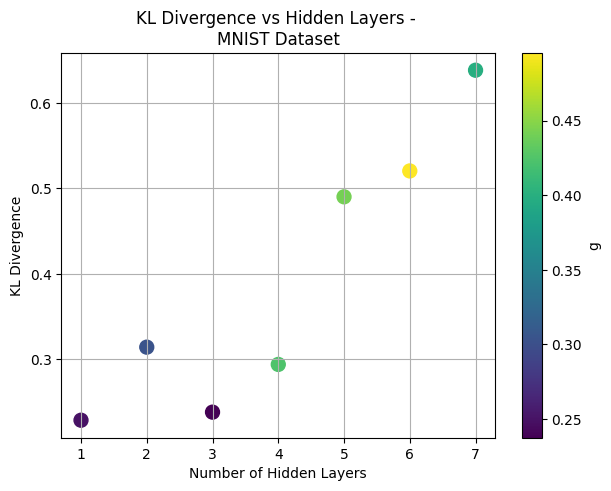

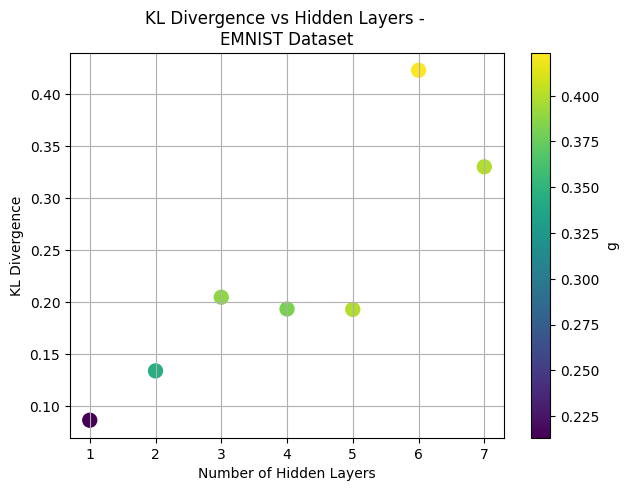

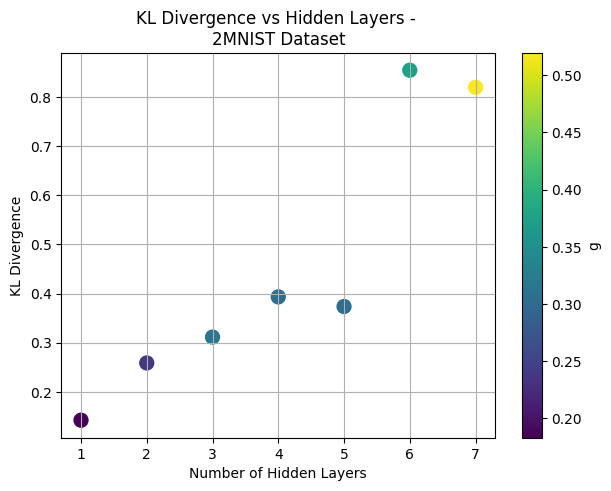

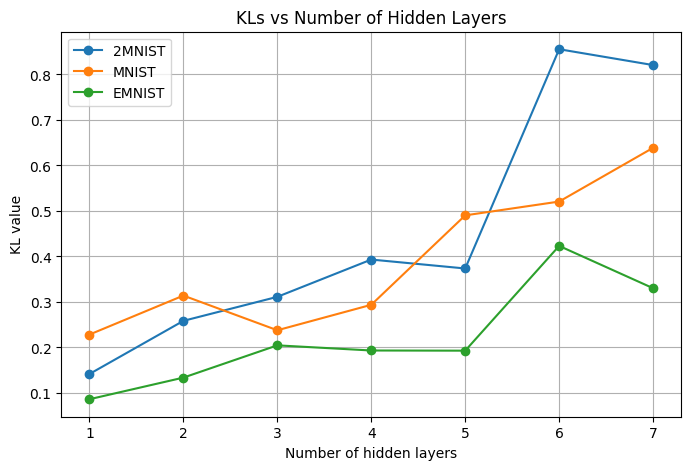

In [12]:
KLs_dict = {
    '2MNIST': [],
    'MNIST': [],
    'EMNIST': []}

gs_dict = {
    '2MNIST': [],
    'MNIST': [],
    'EMNIST': []}  




for dataset in datasets:
    
    for num_hidden_layers in range(1,8):    # 1-7 hl
        latent_dim = 6
        decrease_rate = 0.6
        decrease_rate_str = "06"
        train_loader = train_loaders[dataset]
        val_loader = val_loaders[dataset]
        input_dim = 28 * 28
        threshold_for_binarization = 0.4

        my_model = AE_0(
            input_dim=input_dim,
            latent_dim=latent_dim,
            decrease_rate=decrease_rate,
            device=device,
            hidden_layers=num_hidden_layers
        ).to(device)
        model_path = f"/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/{dataset}/ld{latent_dim}_dr{decrease_rate_str}_lr1e3_lwpretrain_{num_hidden_layers}hl.pth"
        my_model.load_state_dict(torch.load(model_path, map_location=device))

        KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True, threshold_for_binarization=threshold_for_binarization)
        
        KLs_dict[dataset].append(KL)
        gs_dict[dataset].append(g)

    plot_KLs_vs_hidden_layers(KLs_dict[dataset], gs_dict[dataset], dataset)

datasets_dicts_comparison(KLs_dict)

## 8 features

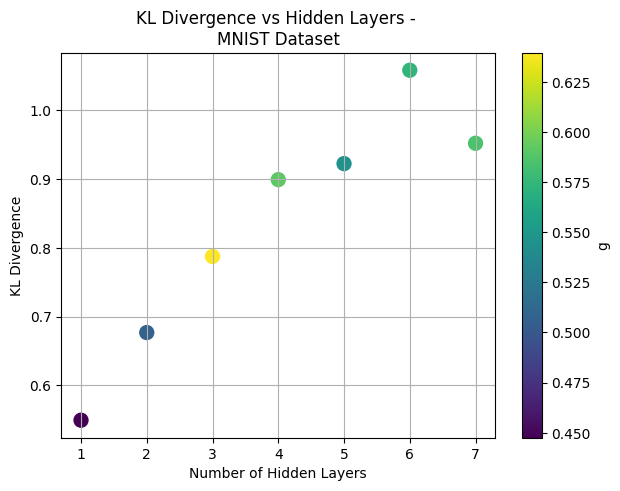

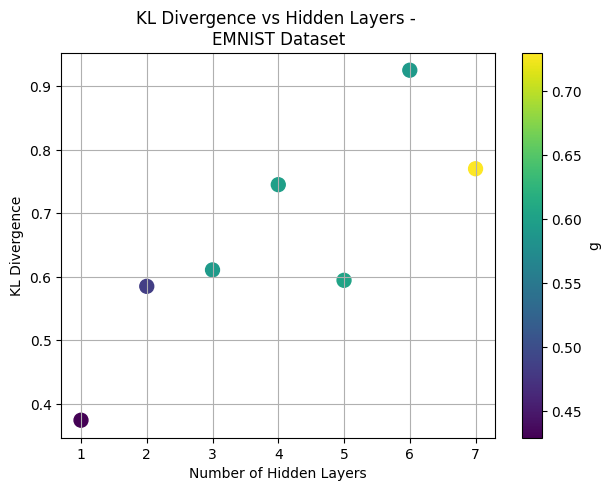

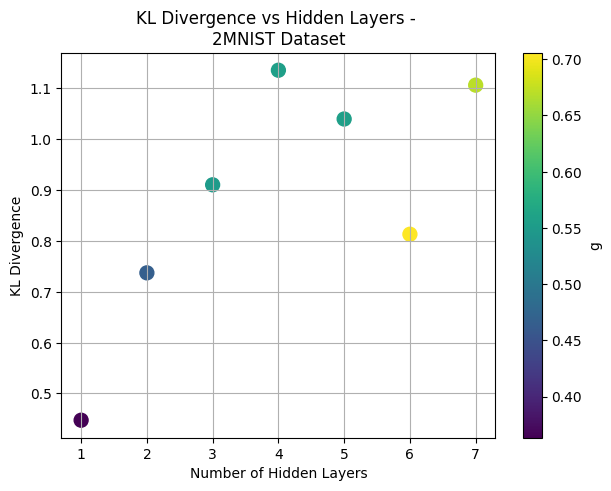

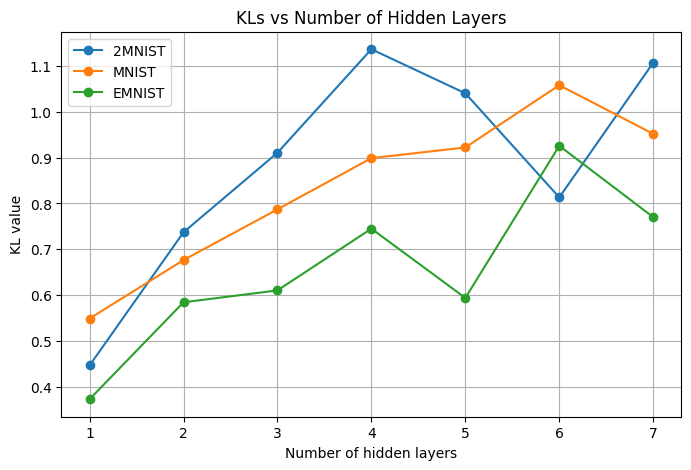

In [14]:
KLs_dict = {
    '2MNIST': [],
    'MNIST': [],
    'EMNIST': []}

gs_dict = {
    '2MNIST': [],
    'MNIST': [],
    'EMNIST': []}  




for dataset in datasets:
    
    for num_hidden_layers in range(1,8):    # 1-7 hl
        latent_dim = 8
        decrease_rate = 0.6
        decrease_rate_str = "06"
        train_loader = train_loaders[dataset]
        val_loader = val_loaders[dataset]
        input_dim = 28 * 28
        threshold_for_binarization = 0.3

        my_model = AE_0(
            input_dim=input_dim,
            latent_dim=latent_dim,
            decrease_rate=decrease_rate,
            device=device,
            hidden_layers=num_hidden_layers
        ).to(device)
        model_path = f"/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/{dataset}/ld{latent_dim}_dr{decrease_rate_str}_lr1e3_lwpretrain_{num_hidden_layers}hl.pth"
        my_model.load_state_dict(torch.load(model_path, map_location=device))

        KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True, threshold_for_binarization=threshold_for_binarization)
        
        KLs_dict[dataset].append(KL)
        gs_dict[dataset].append(g)

    plot_KLs_vs_hidden_layers(KLs_dict[dataset], gs_dict[dataset], dataset)

datasets_dicts_comparison(KLs_dict)

## 10 features

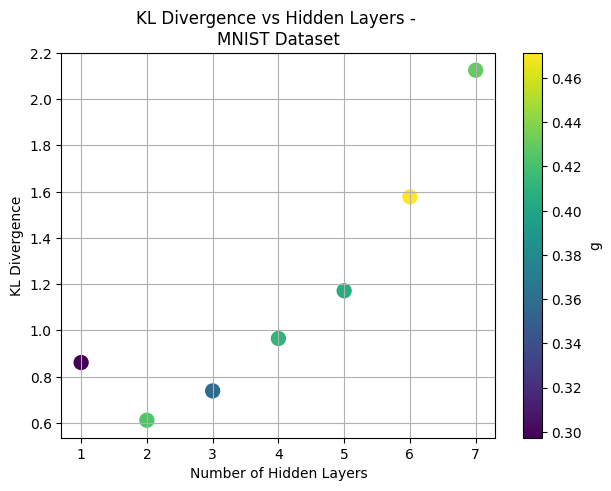

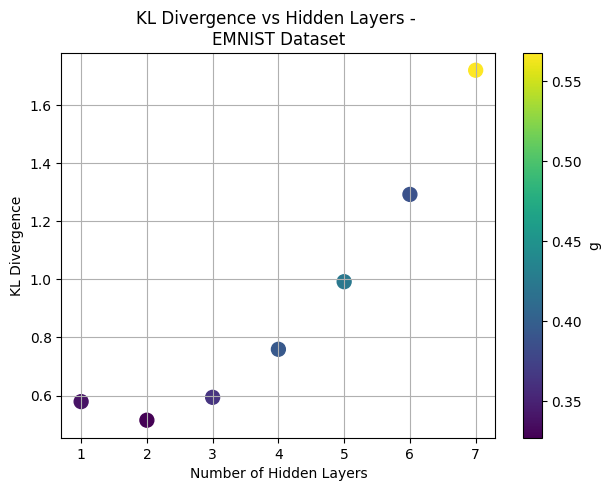

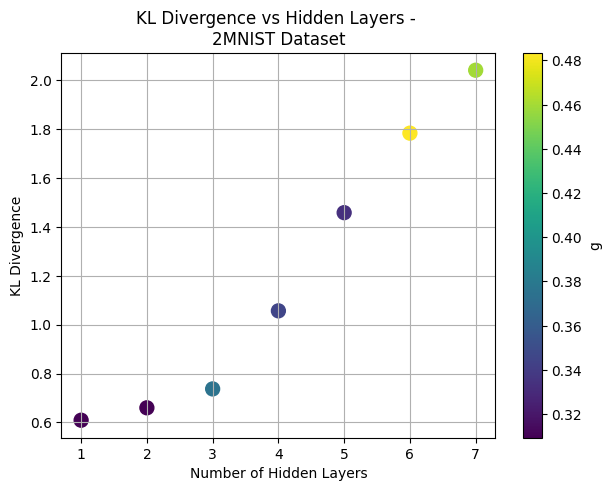

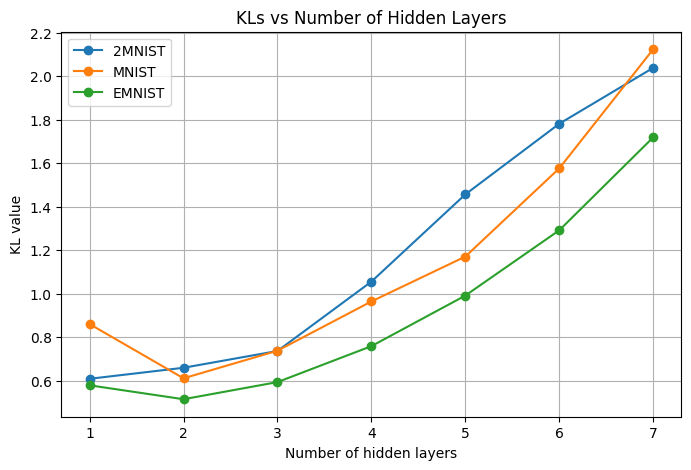

In [4]:
KLs_dict = {
    '2MNIST': [],
    'MNIST': [],
    'EMNIST': []}

gs_dict = {
    '2MNIST': [],
    'MNIST': [],
    'EMNIST': []}  




for dataset in datasets:
    
    for num_hidden_layers in range(1,8):    # 1-7 hl
        latent_dim = 10
        decrease_rate = 0.6
        decrease_rate_str = "06"
        train_loader = train_loaders[dataset]
        val_loader = val_loaders[dataset]
        input_dim = 28 * 28
        threshold_for_binarization = 0.6

        my_model = AE_0(
            input_dim=input_dim,
            latent_dim=latent_dim,
            decrease_rate=decrease_rate,
            device=device,
            hidden_layers=num_hidden_layers
        ).to(device)
        model_path = f"/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders/models/{dataset}/ld{latent_dim}_dr{decrease_rate_str}_lr1e3_lwpretrain_{num_hidden_layers}hl.pth"
        my_model.load_state_dict(torch.load(model_path, map_location=device))

        KL, g = get_KL_with_HFM_with_optimal_g(my_model, train_loader, return_g=True, threshold_for_binarization=threshold_for_binarization)
        
        KLs_dict[dataset].append(KL)
        gs_dict[dataset].append(g)

    plot_KLs_vs_hidden_layers(KLs_dict[dataset], gs_dict[dataset], dataset)

datasets_dicts_comparison(KLs_dict)